# <center>Network Science</center>

Home Assignment #1: Network description and network centralities

#### <hr /> General Information

**Due Date:** 08.05.2020 18:00 <br>
**Late submission policy:** -1 points per day <br>


Please send your reports to <iakarpov@hse.ru> with message subject of the following structure: <br>
**[HSE SNA Magolego 2020] *{LastName}* *{First Name}* HW_*{Number}***

Support your computations with figures and comments. <br>
If you are using IPython Notebook you may use this file as a starting point of your report.

## Problems

### Task 1. Data preparation

<img src ="https://dl.dropboxusercontent.com/s/nt1tbmathgo3gg8/g1.png?dl=1" style="width:600px;heigth:200px">

1.1. Load [VKontakte](https://dl.dropboxusercontent.com/s/8eo1sjfhu5spb0f/vk.tsv?dl=1) dataset to NetworkX <br>
1.2. Choose 3-5 nodes from the existing network and create the subgraph with network framing (only `seed` and `friends#1` nodes, only `r0`, `r1`, `r2` edges) <br>
1.3. Find graph diameter, average and global clustering coefficient <br>
1.4. Find max and mean values of incoming and outcoming node degrees <br>
1.5. Vizualize your graph in gephi or networkX or grahistry <br>


# Import fuction

In [19]:
import pandas as pd
import urllib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


import warnings; warnings.simplefilter('ignore')
G = nx.read_adjlist('facebook_combined.txt')



In [23]:
with open('facebook_combined.txt') as f:
    content = f.readlines()

content = [ [ int(x.strip().split()[0]), int(x.strip().split()[1])]for x in content]

In [20]:
facebook = pd.read_csv(".//facebook_combined.txt", sep="\t")

In [21]:
G_small = nx.read_adjlist('facebook_combined.txt')
print("Number of nodes -", len(G_small.nodes()))
print("Number of edges -", len(G_small.edges()))

Number of nodes - 4039
Number of edges - 88234


In [22]:
k = dict (G_small.degree ())
k2 = {key: value for key, value in k.items() if value > 15 and value < 250}

G2 = G_small.subgraph(list(k2.keys()))
print("Number of nodes -", len(G2.nodes()))
print("Number of edges -", len(G2.edges()))

k3 = ['VK_9292673', 'VK_25232674', 'VK_27094302']

Number of nodes - 2636
Number of edges - 75868


In [24]:
graph = nx.Graph()

for node in content:
    graph.add_edge(node[0],  node[1])

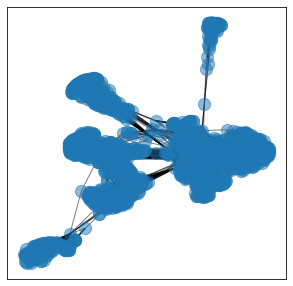

In [25]:
plt.figure(figsize=(5,5))
nx.draw_networkx(graph,
    with_labels=False,
    node_size=150,
    alpha=0.5);

# Graph diameter & Average clustering coefficient

In [26]:
largest_component = max(nx.connected_components(G_small), key=len)
G2 = G_small.subgraph(largest_component)
print("Diameter of connected component -", nx.diameter(G2))
print("Average clustering coefficient - {:.2f}".format(nx.average_clustering(G2)), "\n")

Diameter of connected component - 8
Average clustering coefficient - 0.61 



Average clustering coefficient :  0.60555


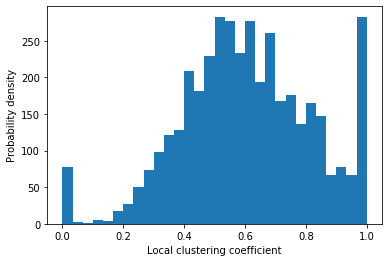

In [27]:
clustering_coeffs = [nx.clustering(graph,i) for i in range(len(graph))]
plt.hist(clustering_coeffs, bins=30);
plt.xlabel("Local clustering coefficient");
plt.ylabel("Probability density");
print("Average clustering coefficient : %8.5f" %np.average(clustering_coeffs))

Observation - Local clustering coefficient (LCC) describes cliqueish behavior in social networks It is a measure of how well-connected your friends are to each other. LCC close 1 means a completely connected friends circles while an LCC of 0 means a disconnected circle. In this data, we see a skew toward more connectedness ()

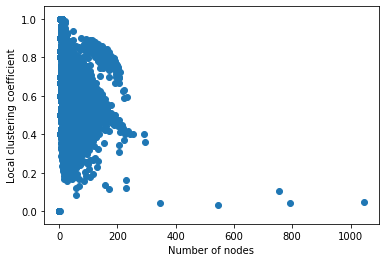

In [28]:
degree_clustering_coeffs = np.array([ [nx.clustering(graph,i),nx.degree(graph,i)]  for i in range(len(graph))])
plt.scatter(degree_clustering_coeffs[:,1], degree_clustering_coeffs[:,0]);
plt.xlabel("Number of nodes");
plt.ylabel("Local clustering coefficient");

# Global clustering coefficient

In [30]:
print(nx.transitivity(G))

0.5191742775433075


(-0.95, 1.05, -1.0, 0.75)

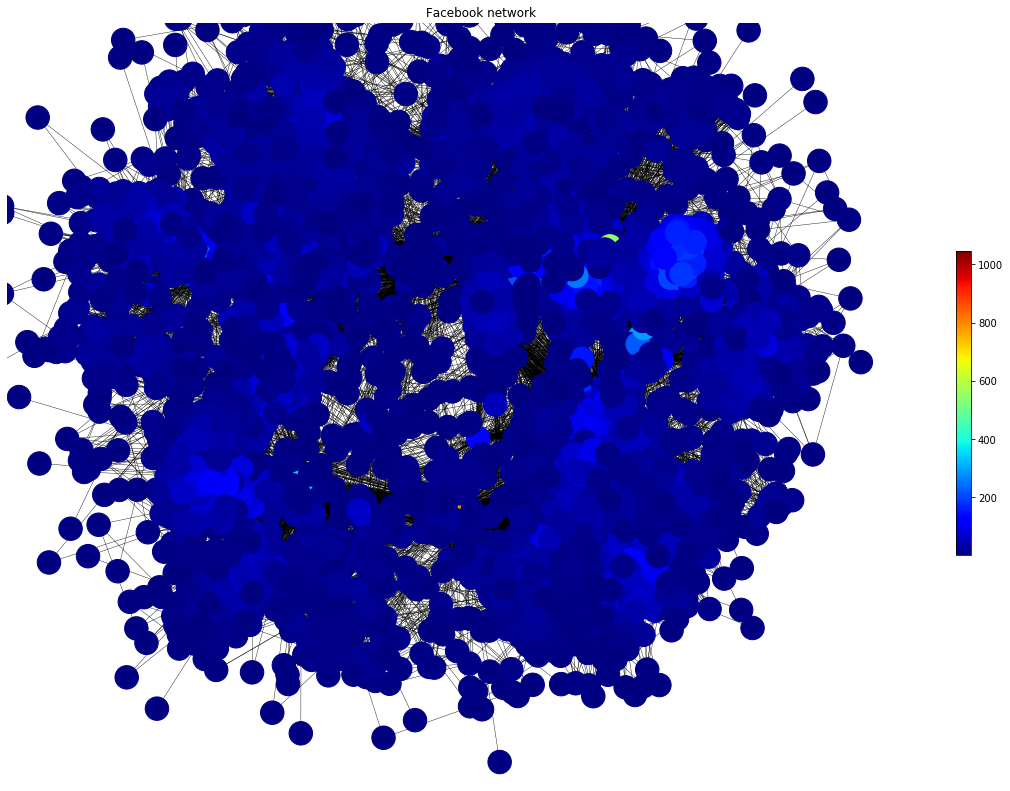

In [32]:
coord = nx.spring_layout(G2, k = 0.15)
plt.figure(figsize=(20,14))
# k = nx.degree(G_small)
k = dict (G_small.degree ())
# print(k)
# set nodes' colors according to their degrees:
node_colors = list(k.values())

nodes = nx.draw_networkx_nodes(G_small, pos = coord, 
                               node_color=node_colors, 
                               node_size = 550, 
                               nodelist=list(k.keys()),                
                               with_labels = False,
                               cmap = 'jet')
edges = nx.draw_networkx_edges(G_small, pos = coord, width = .4)

# the borders can be then reduced to zoom in the graph:
plt.xlim([-.95, 1.05])
plt.ylim([-1., .75])
# add colorbar to see which nodes have the highest degrees:
plt.colorbar(nodes, shrink = .4, pad = .0005, aspect = 20)
plt.title('Facebook network')
plt.axis("off")



In [33]:
# function to create proper histogram in matplotlib:
def plot_hist(data, colormap, alpha, bins = 10, round_value = 1):
    cm = plt.cm.get_cmap(colormap)
    counts, bins, patches = plt.hist(data, alpha = alpha, color = 'Blue', bins = bins)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    plt.xticks(bins.round(round_value))
    col = bin_centers - min(bin_centers)
    col /= max(col)
    # use various colors for different bins:
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

Text(41, 47, 'Min degree - 1')

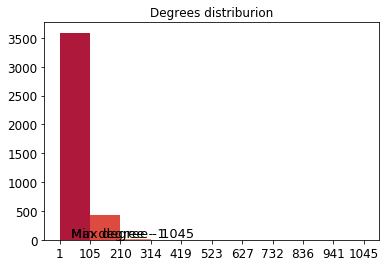

In [34]:
plt.title("Degrees distriburion", y = 1.00)
plot_hist(data = list(k.values()), colormap = 'RdYlBu', alpha = 0.9, bins = 10, round_value=1)
plt.text(x = 41, y = 52, s = "Max degree - " + str(max(k.values())), fontsize = 13)
plt.text(x = 41, y = 47, s = "Min degree - " + str(min(k.values())), fontsize = 13)

In [35]:
# take only giant connected component for the further analysis: 
largest_component = sorted(nx.connected_components(G_small), key = len, reverse=True)
print(len(largest_component))
Gc = G_small.subgraph(largest_component[0])
print("Number of nodes -", len(Gc.nodes()))
print("Number of edges -", len(Gc.edges()))

1
Number of nodes - 4039
Number of edges - 88234


In [36]:
k2 = {key: value for key, value in k.items() if value > 15 and value < 250}

G2 = G_small.subgraph(list(k2.keys()))
print("Number of nodes -", len(G2.nodes()))
print("Number of edges -", len(G2.edges()))

Number of nodes - 2636
Number of edges - 75868


# Vizualize your graph in gephi or networkX or grahistry

(-0.95, 1.05, -1.0, 0.75)

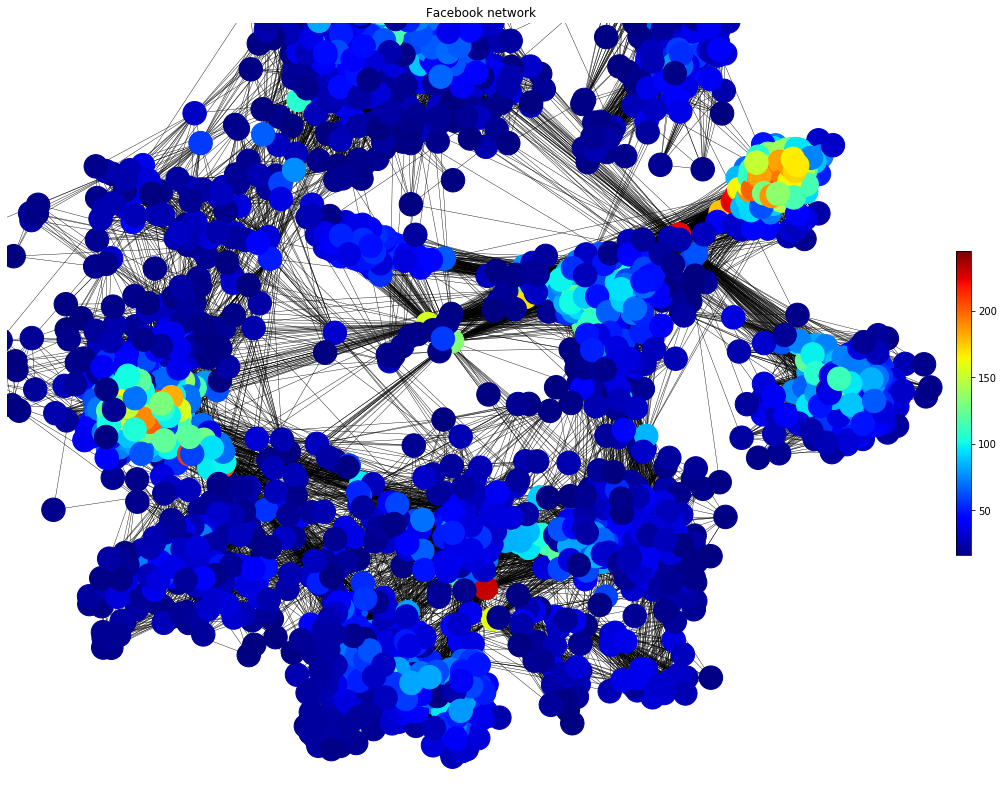

In [37]:
coord = nx.spring_layout(G2, k = 0.15)

plt.figure(figsize=(20,14))

node_colors = list(k2.values())

nodes = nx.draw_networkx_nodes(G2, pos = coord, 
                               node_color=node_colors, 
                               node_size = 550, 
                               nodelist=list(k2.keys()),                
                               with_labels = False,
                               cmap = 'jet')
edges = nx.draw_networkx_edges(G2, pos = coord, width = .4)

# the borders can be then reduced to zoom in the graph:
plt.xlim([-.95, 1.05])
plt.ylim([-1., .75])
# add colorbar to see which nodes have the highest degrees:
plt.colorbar(nodes, shrink = .4, pad = .0005, aspect = 20)
plt.title('Facebook network')
plt.axis("off")

### Task 2. Power Law
2.1. Check that Zipf's Law holds <br>
2.2. Assuming that the data is distributed according to the Power Law, find :
 * $\alpha$ of the distribution
 * mean sample variance $\sigma^2$
 
2.3. Determine $x_{min}$ via Kolmogorov-Smirnov test

# Import fuction

In [1]:
import pandas as pd
import urllib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


import warnings; warnings.simplefilter('ignore')
G = nx.read_adjlist('facebook_combined.txt')

In [2]:
print('Number of vertices:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())
print('Number of connected components', nx.number_connected_components(G))

Number of vertices: 4039
Number of edges: 88234
Number of connected components 1


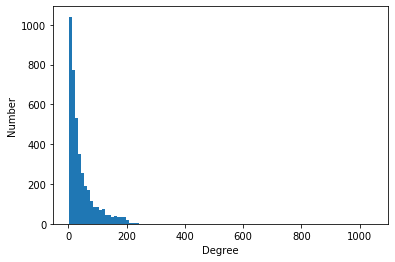

In [3]:
degrees_dictionary = dict(G.degree())
degrees = np.array(list(dict(G.degree()).values()))

# show node degrees
plt.xlabel('Degree')
plt.ylabel('Number')
plt.hist(degrees, 100)
plt.show()

Given the histogram above one can make a conclusion that the network satisfies Power Law.



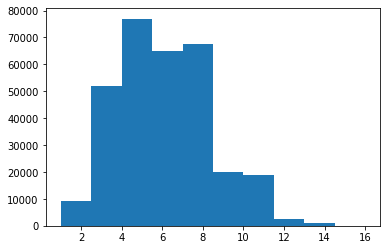

In [4]:
CC = sorted(nx.connected_components(G), key = len, reverse=True)

import random
cc0 = np.array(list(CC[0]))
subG = G.subgraph(np.random.choice(cc0, 1000))

shortest_paths = nx.shortest_path(subG)
lengths = []
for target, paths in shortest_paths.items():
    for k, value in paths.items():
        lengths.append(len(value))

plt.hist(lengths, 10)
plt.show()

Now let's compute max and mean degrees in the graph (since graph is undirected in-degrees and out-degrees coincide).

In [5]:
print('Max degree:', max(degrees))
print('Mean degree', np.mean(degrees))

Max degree: 1045
Mean degree 43.69101262688784


# Zipf's Law

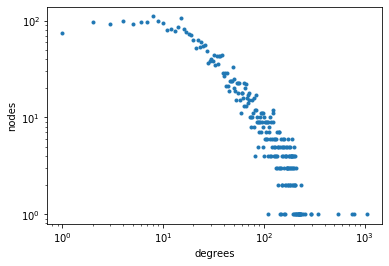

In [7]:
from collections import Counter
d = Counter(degrees)
plt.xlabel('degrees')
plt.ylabel('nodes')
plt.loglog(list(d.keys()), list(d.values()), '.', lw=2)
plt.show()

From the graph above one can obtain a rough value of the $x_{min}$, which is slightly more than 100.
To compute $\alpha$ and $\sigma^2$:

$\alpha = 1 + n (\sum ln( \frac{x_i}{x_{min}}))^{-1}$

$\sigma ^2 = \frac{\alpha - 1}{\sqrt{n}}$

# Estimated alpha & sigma square

In [11]:
def get_alpha(x_min):
    new_degrees = []
    for degree in degrees:
        if degree >= x_min:
            new_degrees.append(degree)

    n = len(new_degrees) + 0.0
    
    alpha = 0.0
    for degree in new_degrees:
        alpha = alpha + (np.log(degree / x_min))

    alpha = 1 + n / alpha
    
    return alpha

In [12]:
x_min = 15.0
            
new_degrees = []
for degree in degrees:
    if degree >= x_min:
        new_degrees.append(degree)

n = len(new_degrees) + 0.0

alpha = 0.0
for degree in new_degrees:
    alpha = alpha + (np.log(degree / x_min))

alpha = 1 + n / alpha

alpha = get_alpha(x_min)
sigma = (alpha - 1) / np.sqrt(n)

print('Estimated alpha:', alpha)
print('and sigma squared:', sigma)

Estimated alpha: 1.9049947612440015
and sigma squared: 0.017257572966188045


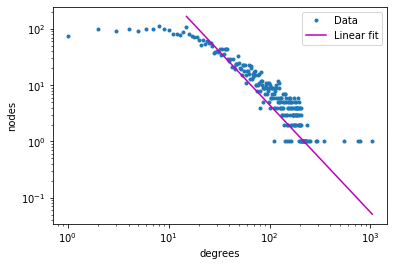

In [13]:
c = Counter(new_degrees)

C = (alpha - 1) * (x_min ** (alpha - 1))

def f(x):
    return C * (x ** (-alpha)) * n
x = np.arange(x_min, max(degrees), 1)

data, = plt.loglog(list(d.keys()), list(d.values()), '.', lw=2, label = 'Data')
fit,  = plt.loglog(x, f(x), 'm', label = 'Linear fit')
plt.xlabel('degrees')
plt.ylabel('nodes')
plt.legend(handles = [data, fit])
plt.show()

# Kolmogorov-Smirnov test

Now it's time to estimate minimum degree using Kolmogorov-Smirnov test

In [14]:
# define functions to compute model and experimental CDFs

# to remind of one variable I calculated previously: d = Counter(degrees)
d_dict = dict(d)

def f_exp(x, x_min):
    result = 0.0
    N = 0.0
    for degree, nodes in d_dict.items():
        if degree >= x_min:
            N += nodes
            if degree <= x:
                result += nodes
    return result / N


def f_model(x, x_min, alpha):
    return 1 - (x / x_min) ** (1 - alpha)

In [15]:
# this is for plot D(x_min)
D_cords = dict()

def calculate_D(x_min):
    array = []
    alpha = get_alpha(x_min)
    for degree in d_dict.keys():
        if degree >= x_min:
            result = np.abs(f_model(degree, x_min, alpha) - f_exp(degree, x_min))
            array.append(result)
            D_cords[x_min] = result
    return max(array)

temp = dict()
for degree in d_dict.keys():
    if degree < 628:    
        temp[degree] = calculate_D(degree + 0.0)

In [16]:
real_x_min = min(temp,key=temp.get) + 0.0
print(real_x_min)

real_alpha = get_alpha(real_x_min)
real_C = (real_alpha - 1) * (real_x_min ** (real_alpha - 1))

46.0


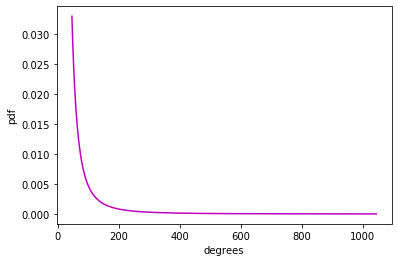

In [17]:
def pdf(x):
    return real_C * x ** (-real_alpha)
x = np.arange(real_x_min, max(degrees), 1)

plt.xlabel('degrees')
plt.ylabel('pdf')
plt.plot(x, pdf(x), 'm', label = 'PDF')
plt.show()

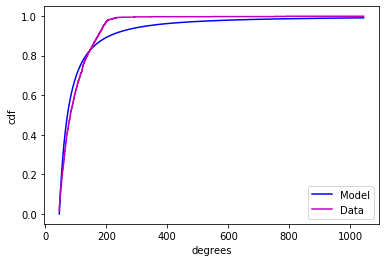

In [18]:
def cdf(x):
    return 1 - (x / real_x_min) ** (1 - real_alpha)

model, = plt.plot(x, cdf(x), 'b', label = 'Model')
y = []
for point in x:
    y.append(f_exp(point, real_x_min))
data,  = plt.step(x, y, 'm', label = 'Data')
plt.xlabel('degrees')
plt.ylabel('cdf')
plt.legend(handles = [model, data])
plt.show()

### Task 3. Structural analysis

3.1. Print 5 nodes with maximum degree centrality, vizualize your graph with color or size as the function of degree <br>
3.2. Print 5 nodes with maximum betweenness centrality, vizualize your graph with color or size as the function of degree <br>
3.3. Print 5 nodes with maximum eigenvector centrality, vizualize your graph with color or size as the function of degree <br>
3.4 Print histogram with centralities distribution of your graph <br>

# Import fuction

In [1]:
import pandas as pd
import urllib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import networkx as nx
G=nx.read_edgelist('facebook_combined.txt',nodetype=int,create_using=nx.DiGraph())


import warnings; warnings.simplefilter('ignore')

# Reading Data

### Source - Publicly available data at http://snap.stanford.edu/data/ego-Facebook.html, which provides information about people and their friends. The data is anonymized.

In [2]:
f = pd.read_csv(".//facebook_combined.txt", sep="\t")

In [6]:
with open('facebook_combined.txt') as f:
    content = f.readlines()

content = [ [ int(x.strip().split()[0]), int(x.strip().split()[1])]for x in content]

In [4]:
graph = nx.Graph()

for node in content:
    graph.add_edge(node[0],  node[1])

In [5]:
# Gut check to see if we are working with the same data as the source
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


# Visualization

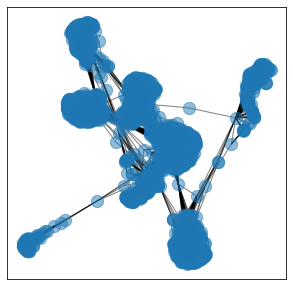

In [7]:
plt.figure(figsize=(5,5))
nx.draw_networkx(graph,
    with_labels=False,
    node_size=150,
    alpha=0.5);

# Degree centrality

In [8]:
G = nx.read_adjlist('facebook_combined.txt')
coord = nx.spring_layout(G, k = 0.15)



In [9]:
Gc = max(nx.connected_component_subgraphs(G), key=len)
print("Number of nodes -", len(Gc.nodes()))
print("Number of edges -", len(Gc.edges()))

Number of nodes - 4039
Number of edges - 88234


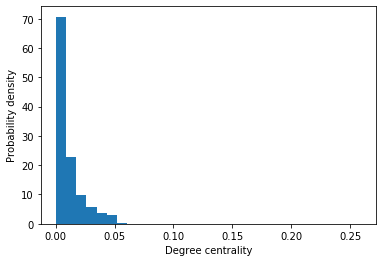

In [10]:
degree_centralities = nx.degree_centrality(graph)
degree_centralities_array = []
for key, value in degree_centralities.items():
    degree_centralities_array.append([key,value])
degree_centralities_array = np.array(degree_centralities_array)

plt.hist(degree_centralities_array[:,1], bins=30, density=True);
plt.xlabel("Degree centrality");
plt.ylabel("Probability density");

### Observations - Positively skewed distribution

In [11]:
dict1=G.degree()
print("The node with maximum degree is :")
i = max(nx.degree_centrality(G),key=(nx.degree_centrality(G)).get)

val=dict1[i]
for p,r in dict1:
    if (r==val):
        print (str(p),str(r))

print("\n")   
print("Node    Degree Centrality")

dict_sorted_keys = sorted(nx.degree_centrality(G), key=(nx.degree_centrality(G)).get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w <= 5):
        w=w+1
        print(str(r)+"\t"+str(dict1[r]))

The node with maximum degree is :
107 1045


Node    Degree Centrality
107	1045
1684	792
1912	755
3437	547
0	347


#### Here the node with highest degree is 107
#### It means they have the maximum number of friends in the network i.e, 1045
#### Node 107 is the most popular and is expected to contain the maximum amount of information

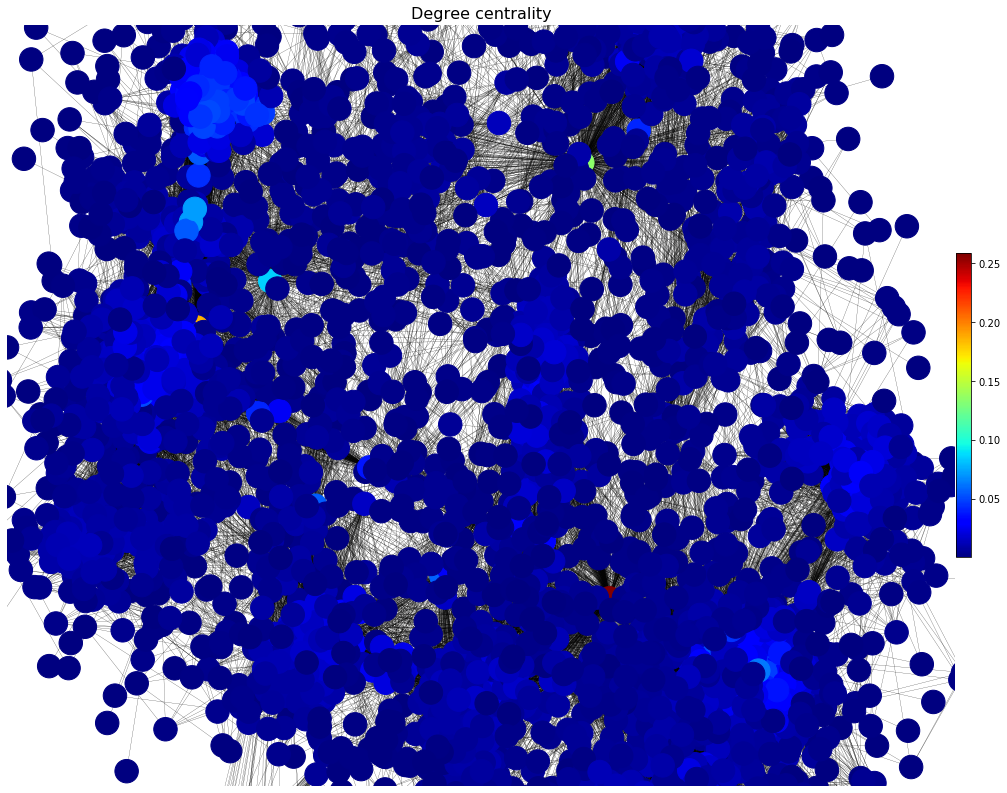

In [12]:
plt.figure(figsize=(20,14))
degree_centr = nx.degree_centrality(Gc)
node_colors = list(degree_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(degree_centr.keys()),
                               cmap = 'jet',
                               with_labels = False)
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Degree centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(degree_centr, key = degree_centr.get)[:5]

# Between centrality

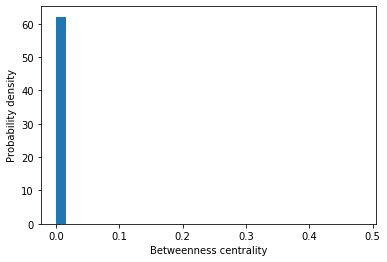

In [13]:
betweenness_centralities = nx.betweenness_centrality(graph)
betweenness_centralities_array = []
for key, value in betweenness_centralities.items():
    betweenness_centralities_array.append([key,value])
betweenness_centralities_array = np.array(betweenness_centralities_array)

plt.hist(betweenness_centralities_array[:,1], bins=30, density=True);
plt.xlabel("Betweenness centrality");
plt.ylabel("Probability density");

#### Observation - In this graph, most people had low betweenness centrality which means that they are not influential in the flow of information across people and connections since they don't appear in the shortest path to the spread of information from one person to another.

In [14]:
dict =nx.betweenness_centrality(G)
i= max(nx.betweenness_centrality(G),key=(nx.betweenness_centrality(G)).get)
print("Node with maximum Betweenness Centrality : ")
print(i,dict[i])

print("\n")
print("Node    Betweenness Centrality")

dict_sorted_keys = sorted(dict, key=dict.get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w<=5):
        w=w+1
        print (str(r)+"\t"+str(dict[r]))

Node with maximum Betweenness Centrality : 
107 0.4805180785560152


Node    Betweenness Centrality
107	0.4805180785560152
1684	0.3377974497301992
3437	0.23611535735892905
1912	0.2292953395868782
1085	0.14901509211665306


#### The betweeness centrality is most for node 107.
#### So the most data or information can be passed from this node for most pair of nodes because the shortest path can be passed from this node.
#### This node would experience the max flow of information through it in the network

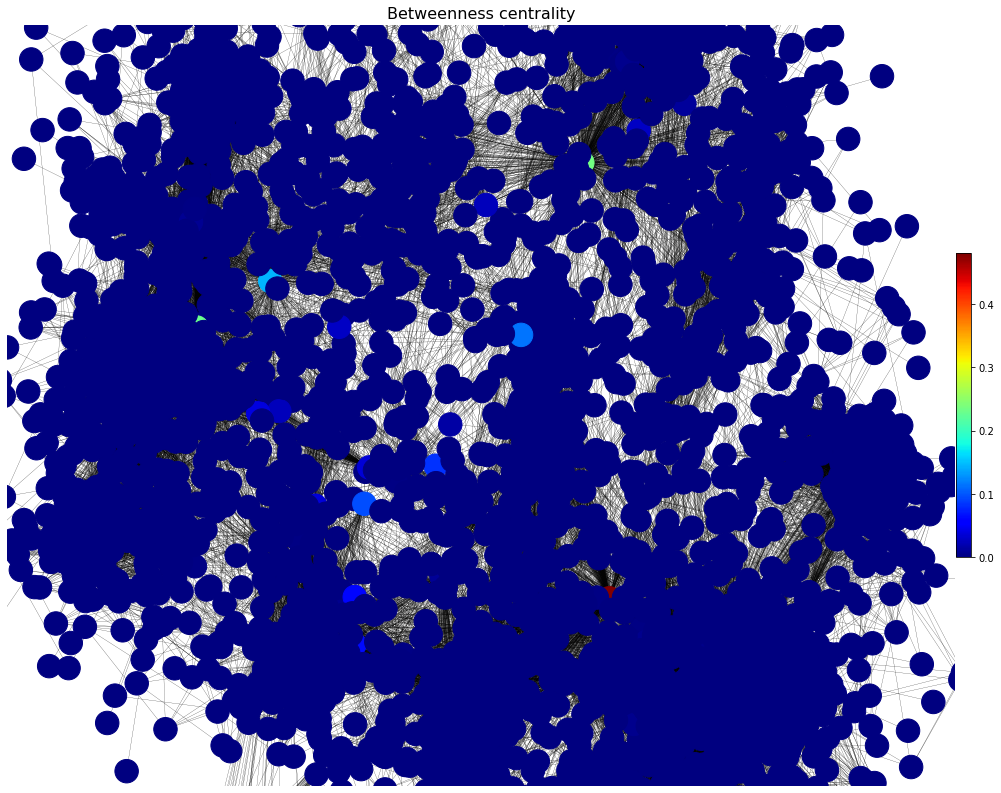

In [15]:
plt.figure(figsize=(20,14))
between_centr = nx.betweenness_centrality(Gc)
node_colors = list(between_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(between_centr.keys()),
                               cmap = 'jet',
                               with_labels = False
                               )
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Betweenness centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(between_centr, key = between_centr.get)[:5]

# Eigenvector centrality

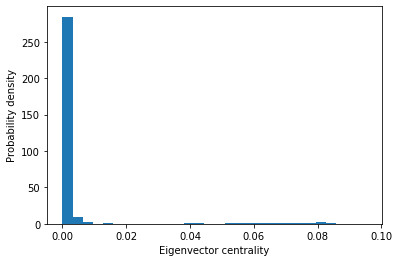

In [16]:
eigenvector_centralities = nx.eigenvector_centrality(graph)
eigenvector_centralities_array = []
for key, value in eigenvector_centralities.items():
    eigenvector_centralities_array.append([key,value])
eigenvector_centralities_array = np.array(eigenvector_centralities_array)

plt.hist(eigenvector_centralities_array[:,1], bins=30, density=True);
plt.xlabel("Eigenvector centrality");
plt.ylabel("Probability density");

#### Observation - This shows that most people are not connected to high influencers, but there are some peole that can be influencers with eigenvector centrality between 0.06-0.08. The distribution is expected to be different than the distribution of the number of friends, since every friend is not equal, and connection with well-connected friends is more important in this analysis.

In [17]:
dict =nx.eigenvector_centrality(G, max_iter = 10000)
i= max(nx.eigenvector_centrality(G, max_iter = 10000),key=(nx.eigenvector_centrality(G, max_iter = 10000)).get)
print("Node with maximum Eigenvector Centrality : ")
print(i,dict[i])

print("\n")
print("Node    Eigenvector Centrality")

dict_sorted_keys = sorted(dict, key=dict.get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w<=5):
        w=w+1
        print (str(r)+"\t"+str(dict[r]))

Node with maximum Eigenvector Centrality : 
1912 0.09540696149067629


Node    Eigenvector Centrality
1912	0.09540696149067629
2266	0.08698327767886553
2206	0.08605239270584343
2233	0.08517340912756598
2464	0.08427877475676092


#### The Eigen vector centrality for node 1912 is most. So according to the eigen vector centrality, 2655 is most influential node here.

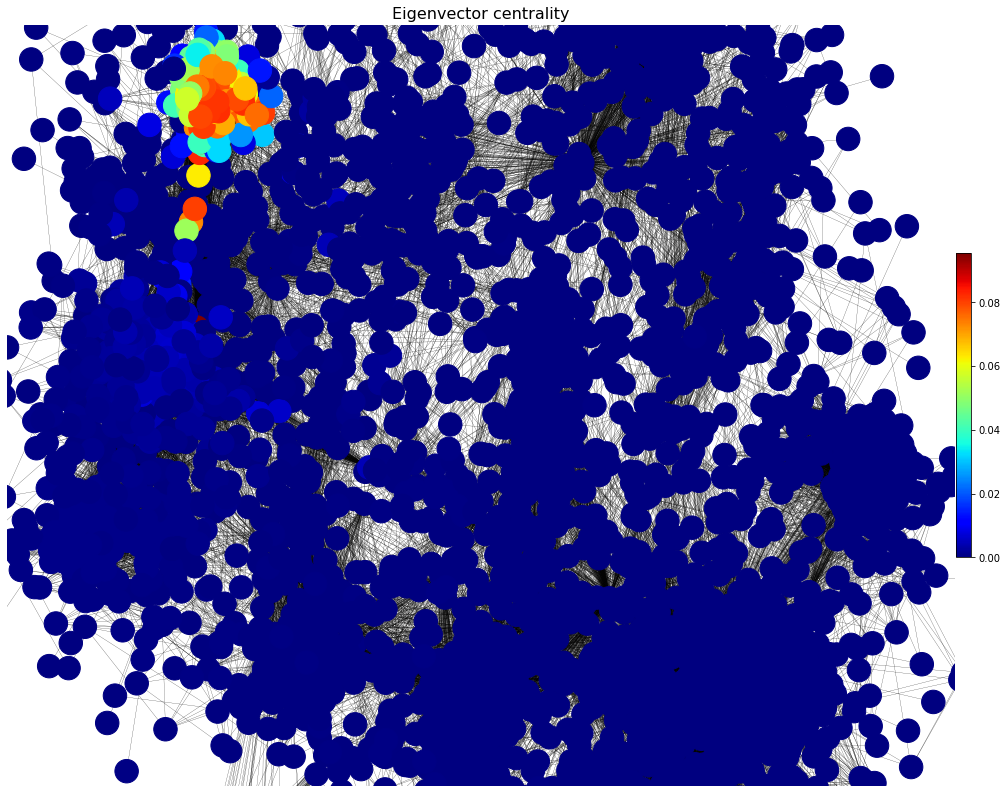

In [18]:
plt.figure(figsize=(20,14))
eigenvector_centr = nx.eigenvector_centrality(Gc)
node_colors = list(eigenvector_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(eigenvector_centr.keys()),
                               cmap = 'jet',
                               with_labels = False)
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Eigenvector centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(eigenvector_centr, key = eigenvector_centr.get)[:5]



# Closeness centrality

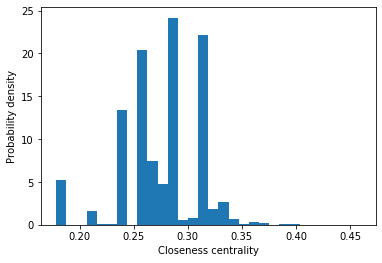

In [19]:
closeness_centralities = nx.closeness_centrality(graph)
closeness_centralities_array = []
for key, value in closeness_centralities.items():
    closeness_centralities_array.append([key,value])
closeness_centralities_array = np.array(closeness_centralities_array)

plt.hist(closeness_centralities_array[:,1], bins=30, density=True);
plt.xlabel("Closeness centrality");
plt.ylabel("Probability density");

#### Observations - This is a distribution of how close people are to other people in the network. Mathematically, it is the average distance between people for each person in the network. Similar to signals in the previous graph, there are some people that are very close to or well-connnected to most people in the network. In this graph, these people are featured with lowe closeness centrality values.

In [20]:
dict =nx.closeness_centrality(G)
i= max(nx.closeness_centrality(G),key=(nx.closeness_centrality(G)).get)
print("Node with maximum Closeness Centrality : ")
print(i,dict[i])

print("\n")
print("Node    Closeness Centrality")

dict_sorted_keys = sorted(dict, key=dict.get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w<=5):
        w=w+1
        print (str(r)+"\t"+str(dict[r]))

Node with maximum Closeness Centrality : 
107 0.45969945355191255


Node    Closeness Centrality
107	0.45969945355191255
58	0.3974018305284913
428	0.3948371956585509
563	0.3939127889961955
1684	0.39360561458231796


#### The closeness centrality is maximum for node 107.
#### This signifies that node 107 is more central or to say that it has least distance with all other nodes as compared to any other node in the Network.
#### This node can influence the entire network most quickly

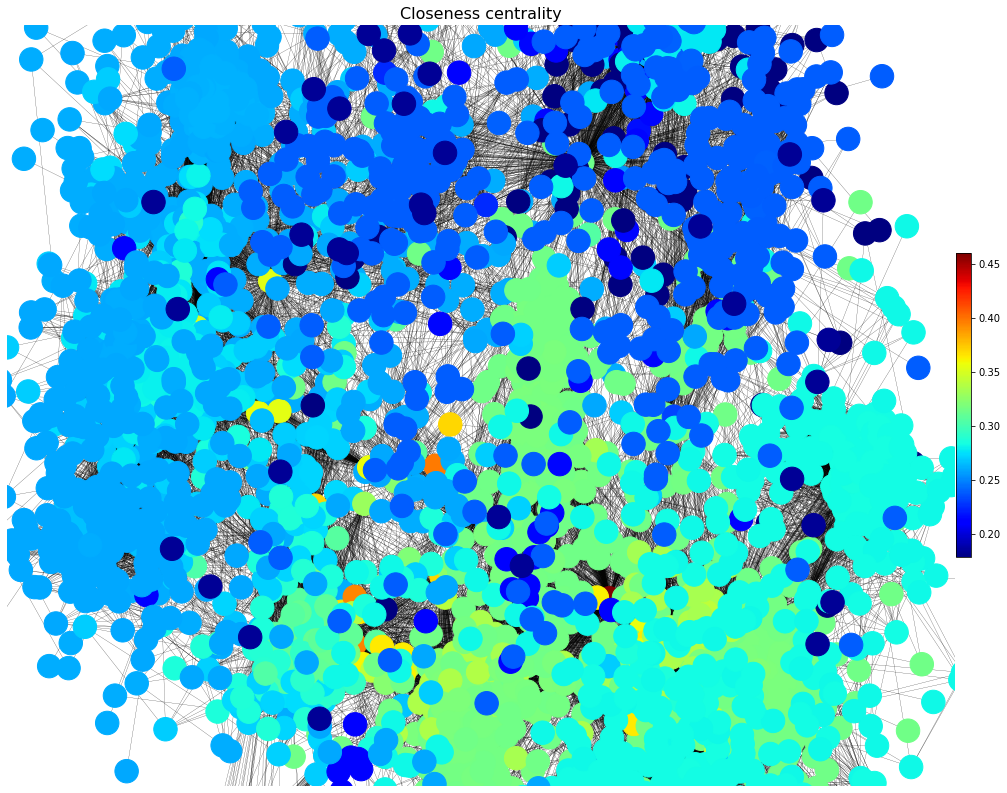

In [21]:
plt.figure(figsize=(20,14))
closeness_centr = nx.closeness_centrality(Gc)
node_colors = list(closeness_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(closeness_centr.keys()),
                               cmap = 'jet',
                               with_labels = False
                               )
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Closeness centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(closeness_centr, key = closeness_centr.get)[:5]

# Histogram with centralities distribution

In [22]:
# function to create proper histogram in matplotlib:
def plot_hist(data, colormap, alpha, bins = 10, round_value = 1):
    cm = plt.cm.get_cmap(colormap)
    counts, bins, patches = plt.hist(data, alpha = alpha, color = 'Blue', bins = bins)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    plt.xticks(bins.round(round_value))
    col = bin_centers - min(bin_centers)
    col /= max(col)
    # use various colors for different bins:
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

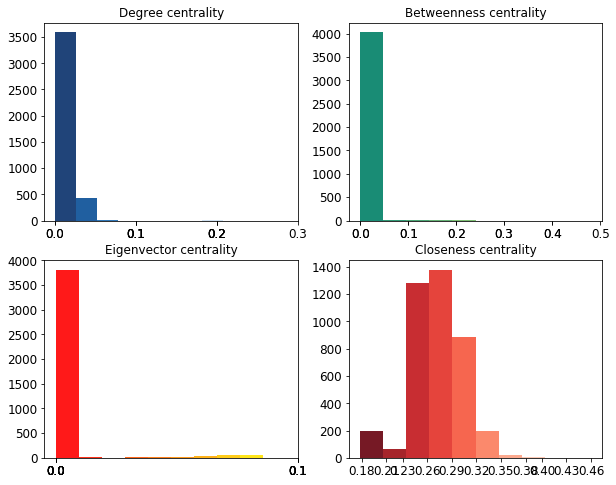

In [23]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.title("Degree centrality", y = 1.00)
plot_hist(data = list(degree_centr.values()), colormap = 'Blues_r', alpha = 0.9, bins = 10, round_value=1)

plt.subplot(2, 2, 2)
plt.title("Betweenness centrality", y = 1.00)
plot_hist(data = list(between_centr.values()), colormap = 'summer', alpha = 0.9, bins = 10, round_value=1)

plt.subplot(2, 2, 3)
plt.title("Eigenvector centrality", y = 1.00)
plot_hist(data = list(eigenvector_centr.values()), colormap = 'autumn', alpha = 0.9, bins = 10)

plt.subplot(2, 2, 4)
plt.title("Closeness centrality", y = 1.00)
plot_hist(data = list(closeness_centr.values()), colormap = 'Reds_r', alpha = 0.9, bins = 10, round_value=2)